In [3]:
import torch
import os
import json
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cmap = 'viridis'

In [4]:
folder_name = 'localized_N_100_c_3_mu_0.0_num_delta_10_num_input_10_num_trials_10_b0_0.5_b1_0.5'  # Replace with your folder name
path = os.path.join('..', 'data', folder_name)

In [5]:
# Load parameters from the JSON file
param_file_path = os.path.join(path, 'parameters.json')
with open(param_file_path, 'r') as f:
    params = json.load(f)

# Extract parameters
num_tasks = params['num_tasks']
num_delta = params['num_delta']
num_input = params['num_input']
num_trials = params['num_trials']
delta_range = np.array(params['delta_range'])
input_range = np.array(params['input_range'])

In [16]:
# Initialize full results arrays
bool_stable = torch.full((num_delta, num_input, num_trials), fill_value=-1, dtype=torch.int8)
spectral_radius = torch.full((num_delta, num_input, num_trials), fill_value=float('nan'), dtype=torch.float32)

# Load and combine partial results
for task_id in range(num_tasks):
    bool_stable_task = torch.load(os.path.join(path, f'bool_stable_task_{task_id}.pt'))
    spectral_radius_task = torch.load(os.path.join(path, f'spectral_radius_task_{task_id}.pt'))
    
    # Find indices where bool_stable_task != -1
    indices = (bool_stable_task != -1).nonzero(as_tuple=True)
    bool_stable[indices] = bool_stable_task[indices]
    spectral_radius[indices] = spectral_radius_task[indices]

# # Proceed with plotting or further analysis
bool_stable = bool_stable.bool()
percent_stable = bool_stable.float().mean(dim=2) * 100

In [20]:
# remove all the files ending with .pt inside the folder
for file in os.listdir(path):
    if file.endswith('.pt'):
        os.remove(os.path.join(path, file))

# Save full results
torch.save(bool_stable, os.path.join(path, f'bool_stable.pt'))
torch.save(spectral_radius, os.path.join(path, f'spectral_radius.pt'))
torch.save(percent_stable, os.path.join(path, f'percent_stable.pt'))

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
plt.imshow(percent_stable, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap='viridis')
colorbar = plt.colorbar(label="Percent Stable Circuits", fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=14)

# add legend
plt.legend(fontsize=20, loc='lower right')

# Set font sizes
plt.xlabel(r'Contrast', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22)
plt.title("Phase Diagram: Percent Stable Circuits", fontsize=20)

# Increase tick label size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
colorbar.set_label("Percent Stable Circuits", fontsize=20)
# save the figure in svg
save_fig_path = os.path.join(path, 'percent_stable_circuits.svg')
plt.savefig(save_fig_path)

# spectral radius plotting
spectral_radius_mean = spectral_radius.mean(dim=2)
plt.figure(figsize=(12, 10))
plt.imshow(spectral_radius_mean, extent=[input_range.min(), input_range.max(), delta_range.min(), delta_range.max()],
           origin='lower', aspect='auto', cmap=cmap)
colorbar = plt.colorbar(label="Mean Spectral Radius", fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=14)

# Set the labels and title
plt.xlabel('Input norm', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22)
plt.title("Phase Diagram: Mean Spectral Radius", fontsize=20)

# Increase tick label size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
colorbar.set_label("Mean Spectral Radius", fontsize=20)

# Save the figure as SVG
save_fig_path = os.path.join(path, 'mean_spectral_radius.svg')
plt.savefig(save_fig_path)

Code to plot Flaviano's solution.

In [4]:
import torch 
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 100
b0 = 0.5 * torch.ones(N)
b1 = 0.5 * torch.ones(N)
sigma = torch.tensor([0.1])

In [6]:
z = torch.linspace(0, 1, 100)
mus = [0.0, 1.0, 5.0]
deltas = torch.zeros(3, 100)

In [8]:
# for different mus 
for i, mu in enumerate(mus):
    deltas[i] = torch.sqrt((b1 * torch.sqrt(sigma ** 2 + z ** 2) / (1 - b1 * torch.sqrt(sigma ** 2 + z ** 2))) ** 2 - mu ** 2 * (sigma ** 2 / (sigma ** 2 + z ** 2)) ** 2) 

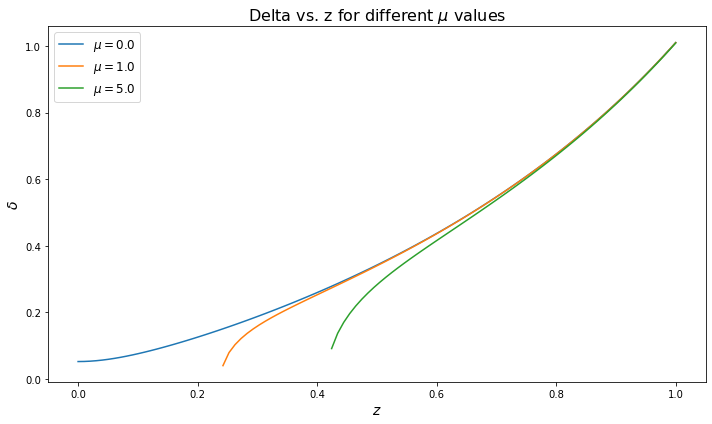

In [10]:
plt.figure(figsize=(10, 6))
for i, mu in enumerate(mus):
    plt.plot(z.numpy(), deltas[i].numpy(), label=f'$\mu = {mu}$')

# Customizing the plot
plt.title('Delta vs. z for different $\mu$ values', fontsize=16)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\delta$', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()